Enable Equation Numbering in $\LaTeX$

In [1]:
%%javascript
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });

<IPython.core.display.Javascript object>

## Math Fundamentals

First we define this definition
\begin{equation}
(\vec{w} \cdot \vec{u} + b) \geq 0 \implies + 
\end{equation}

We add $y_i$ for mathematical convenience

\begin{equation}
y_i ( \vec{x}_i \cdot \vec{w} + b) -1 = 0 
\end{equation}

Calculate the width of the street 

\begin{equation}
width = (\vec{x}_+ - \vec{x}_-) \cdot \frac{\vec{w}}{||\vec{w}||}
\end{equation}

$$ width = \frac{\vec{x}_+ \cdot \vec{w} - \vec{x}_- \cdot \vec{w}}{||\vec{w}||}$$

$$ \vec{x}_i \cdot \vec{w} = \frac{1}{y_i} - b  $$

$$ \vec{x}_+ \cdot \vec{w} = 1 - b , \vec{x}_- \cdot \vec{w} = -1 - b $$

$$ width = \frac{1 - b - (-1 - b)}{||\vec{w}||}$$

$$ width = \frac{1 - b + 1 + b}{||\vec{w}||}$$

And we end up with

\begin{equation}
width = \frac{2}{||\vec{w}||}
\end{equation}


Now we have to maximaze that width so:

$$ Max(width) \rightarrow Max \big( \frac{2}{||\vec{w}||} \big) \rightarrow Max \big( \frac{1}{||\vec{w}||} \big) $$

$$ Max \big( \frac{1}{||\vec{w}||} \big) \rightarrow Min (||\vec{w}||) \rightarrow Min \big( \frac{1}{2} ||\vec{w}|| \big) \rightarrow Min \big( \frac{1}{2} {||\vec{w}||}^2 \big)$$

Applying Lagrange Multipliers

\begin{equation}
L = \frac{1}{2} {||\vec{w}||}^2 - \sum{ \alpha_i [y_i ( \vec{x}_i \cdot \vec{w} + b) -1]}
\end{equation}

$$
\frac{\partial L}{\partial \vec{w}} = \vec{w} - \sum{\alpha_i y_i x_i} = 0 \implies \vec{w} = \sum{\alpha_i y_i x_i}
$$

$$
\frac{\partial L}{\partial b} = - \sum{\alpha_i y_i} = 0 \implies \sum{\alpha_i y_i} = 0
$$

\begin{equation}
L = \frac{1}{2} \big( \sum{\alpha_i y_i \vec{x}_i}\big) \big(\sum{\alpha_i y_i \vec{x}_i}\big) - \sum{ \alpha_i [y_i ( \vec{x}_i \cdot \sum{\alpha_i y_i \vec{x}_i} + b) -1]}
\end{equation}

\begin{equation}
L = \frac{1}{2} \big( \sum{\alpha_i y_i \vec{x}_i}\big) \big(\sum{\alpha_i y_i \vec{x}_i}\big) - \big( \sum{ \alpha_i y_i \vec{x}_i} \big) \cdot \big(\sum{ \alpha_i y_i \vec{x}_i} \big) - \sum{ \alpha_i y_i b} + \sum{ \alpha_i}
\end{equation}

\begin{equation}
L = \sum{ \alpha_i} - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \vec{x}_i \cdot \vec{x}_j
\end{equation}

\begin{equation}
\sum{\alpha_i y_i \vec{x}_i} \cdot \vec{u} + b \geq 0 \implies + 
\end{equation}

So we conclude that the minimization is basically the dot product

## Initialization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import bqplot.pyplot as bplt
import numpy as np

In [51]:
class Support_Vector_Machine():

    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)

    def fit(self, data):
        self.data = data

        # { ||w|| : [w, b]}
        opt_dict = {}
        transforms = [
            [1, 1],
            [-1, 1],
            [-1, -1],
            [1, -1],            
        ]

        all_data = np.array(list(self.data.values())).flatten()

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001,
                      ]

        b_range_multiple = 5

        b_multiple = 5

        latest_optimum = self.max_feature_value * 10

        limit = self.max_feature_value * b_range_multiple

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            while True:
                for b in np.arange(-limit, limit, step * b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link
                        # y_i(x_i.w +b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    break
                            else:
                                continue
                            break

                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]

                if w[0] < 0:
                    break
                w = w - step

            norms = sorted(n for n in opt_dict)

            self.w, self.b = opt_dict[norms[0]]

            latest_optimum = self.w[0] - step * 2
        
        for i in self.data:
            for xi in self.data[i]:
                print(f'{xi} : {yi * (np.dot(self.w, xi) + self.b)}')
        
        print(f'b: {self.b} | w: {self.w}')
        print(f'||w|| : {np.linalg.norm(self.w)}')
        if np.dot(self.w, np.array([1,0])) == 0:
            print("angle:",90)
        else:
            print(f'angle: {np.degrees(np.arctan(self.w[1]/self.w[0]))}')

    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], marker='*',
                            s=200, c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i])
          for x in data_dict[i]]
         for i in data_dict]
        
        xs, ys = zip(*[j for i in data_dict.values() for j in i])
        
        x_max, y_max = max(xs), max(ys)
        x_min, y_min = min(xs), min(ys)
        
        x_margin = x_max*0.2
        y_margin = y_max*0.2
        
        xlist = np.linspace(x_min-x_margin, x_max+x_margin, 100)
        ylist = np.linspace(y_min-y_margin, y_max+y_margin, 100)
        
        X,Y = np.meshgrid(xlist, ylist)
        
        F = self.w[0]*X + self.w[1]*Y + self.b  #  Hyperplane Equation
        plt.contour(X, Y, F, [1], colors = 'r', linestyles = 'solid')       
        plt.contour(X, Y, F, [-1], colors = 'b', linestyles = 'solid')
        plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'dashed')

        plt.show()

In [199]:
all(np.arange(-100, 100, 1) + 5 > 50)

False

In [38]:
data_dict = {
    -1:[
        [1,7],
        [2,8],
        [3,8],
    ],
    1:[
        [5, 1],
        [6, -1],
        [7, 3],
    ]
}

In [305]:
%timeit np.array([j for i in [[key] * len(values) for key, values in data_dict.items()] for j in i])

4.65 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [306]:
%timeit np.array([[key] * len(values) for key, values in data_dict.items()]).flatten()

6.57 µs ± 70.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [310]:
%%timeit
yi = []
for key, lenght in zip(data_dict.keys(), map(len, data_dict.values())):
    yi.append([key] * lenght)
np.array(yi).flatten()

7.36 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [285]:
yi = np.array([j for i in [[key] * len(values) for key, values in data_dict.items()] for j in i])

yi = np.array([[key] * len(values) for key, values in data_dict.items()]).flatten()

yi

array([-1, -1,  1,  1])

In [301]:
%timeit np.array([j for i in [values for key, values in data_dict.items()] for j in i])

5.81 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [302]:
%timeit np.array([j for i in [values for values in data_dict.values()] for j in i])

5.35 µs ± 42.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [300]:
%timeit [i for values in data_dict.values() for i in values]

875 ns ± 35 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [298]:
xi = np.array([j for i in [values for key, values in data_dict.items()] for j in i])

xi = [i for values in data_dict.values() for i in values]

xi

[[0, 0], [1, 0], [0.8660254, 0.5], [2, 2]]

In [254]:
np.array([k for i in list(data_dict.values()) for j in i for k in j])

array([ 0.       ,  0.       ,  1.       ,  1.       ,  0.8660254,  0.5      ])

In [237]:
[3] * 3

[3, 3, 3]

In [241]:
[j for i in [values for key, values in data_dict.items()] for j in i]

[array([0, 0]), array([1, 1]), array([ 0.8660254,  0.5      ])]

In [236]:
a = np.array([1,1])
b = np.array([
    [1,1],
    [0,1],
    [0,0],
    [1,1],
    [1,1],
])
np.dot(b, a) > 1

array([ True, False, False,  True,  True], dtype=bool)

[1, 7] : 1.2239999999999513
[2, 8] : 1.2239999999999511
[3, 8] : 1.0000000000001017
[5, 1] : -1.015999999998542
[6, -1] : -1.6879999999980901
[7, 3] : -1.015999999998542
b: 0.11999999999914479 | w: [ 0.224 -0.224]
||w|| : 0.3167838379713602
angle: -45.0


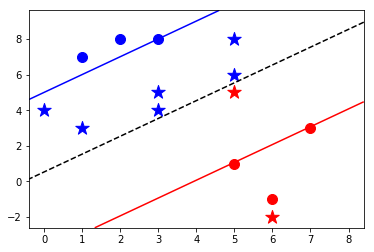

In [52]:
svm = Support_Vector_Machine()
svm.fit(data_dict)

predict_us = [
    [0, 4],
    [1, 3],
    [3, 4],
    [3, 5],
    [5, 5],
    [5, 6],
    [6, -2],
    [5, 8],
]

for p in predict_us:
    svm.predict(p)
svm.visualize()

AttributeError: 'Support_Vector_Machine' object has no attribute 'w_t'

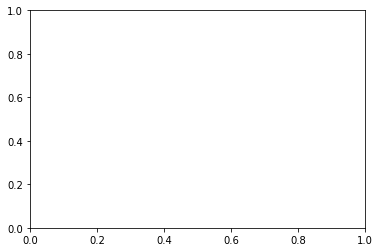

In [50]:
svm = Support_Vector_Machine()
svm.fit(data_dict)
svm.visualize()

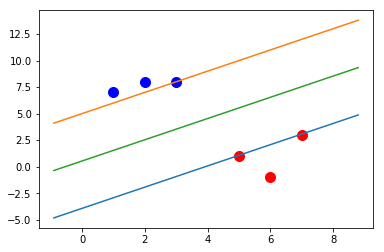

In [39]:
svm = Support_Vector_Machine()
svm.fit(data_dict)
svm.visualize()

In [131]:
v = np.array([1, 0])
angle = 60
angle_r = np.radians(angle)
m = np.array([
    [np.cos(angle_r), -np.sin(angle_r)],
    [np.sin(angle_r), np.cos(angle_r)]
])


nv = np.matmul(m, v.T)

nv[np.abs(nv) < 1e-3] = 0

nv

array([ 0.5      ,  0.8660254])

In [130]:
v = np.array([1, 1])
m = np.array([0.8660254,  0.5])
d = m * v
d, np.degrees(np.arctan(d[1]/d[0]))

(array([ 0.8660254,  0.5      ]), 30.000000108416181)

In [53]:
import numpy as np

def func(X):
    w = X[0]
    b = X[1]
    L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    return 1/np.linalg.norm(w) + L * ()

In [54]:
def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda

In [56]:
from scipy.optimize import fsolve

X1 = fsolve(dfunc, [1, 1, 0])
print(X1, func(X1))

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print(X2, func(X2))

[ 0.70710678  0.70710678 -0.70710678] 1.41421356237
[-0.70710678 -0.70710678  0.70710678] -1.41421356237
